# Final Project C++
- Authors: Ilyas El Haroui, Alan Zhang
- CS3520 Fall-2023

## Install Required Libraries

In [1]:
!pip install Pillow numpy


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Import Augmented Dataset 

In [2]:
import os
from PIL import Image
import numpy as np

def load_images_from_folder(folder, size=(32, 32)):
    images = []
    labels = []
    for label in os.listdir(folder):
        label_folder = os.path.join(folder, label)
        if os.path.isdir(label_folder):
            for filename in os.listdir(label_folder):
                img_path = os.path.join(label_folder, filename)
                with Image.open(img_path) as img:
                    img_resized = img.resize(size)
                    images.append(np.array(img_resized))
                    labels.append(label)
    return images, labels

# Paths to your train and test directories
train_dir = "C:/Users/ilyas/Downloads/Processed-CIFAR-10-images/train"
test_dir = "C:/Users/ilyas/Downloads/Processed-CIFAR-10-images/test"

train_images, train_labels = load_images_from_folder(train_dir)
test_images, test_labels = load_images_from_folder(test_dir)

# Convert lists to numpy arrays if needed
train_images = np.array(train_images)
test_images = np.array(test_images)

# Print to verify
print(f"Total training images: {len(train_images)}")
print(f"Total testing images: {len(test_images)}")

# Creating sets of unique labels
unique_train_labels = set(train_labels)
unique_test_labels = set(test_labels)

# Print unique class labels
print("Training Labels:", unique_train_labels)
print("Testing labels:", unique_test_labels)


Total training images: 50000
Total testing images: 10000
Training Labels: {'automobile', 'frog', 'dog', 'deer', 'airplane', 'ship', 'cat', 'horse', 'truck', 'bird'}
Testing labels: {'automobile', 'frog', 'dog', 'deer', 'airplane', 'ship', 'cat', 'horse', 'truck', 'bird'}


## Distribution of data

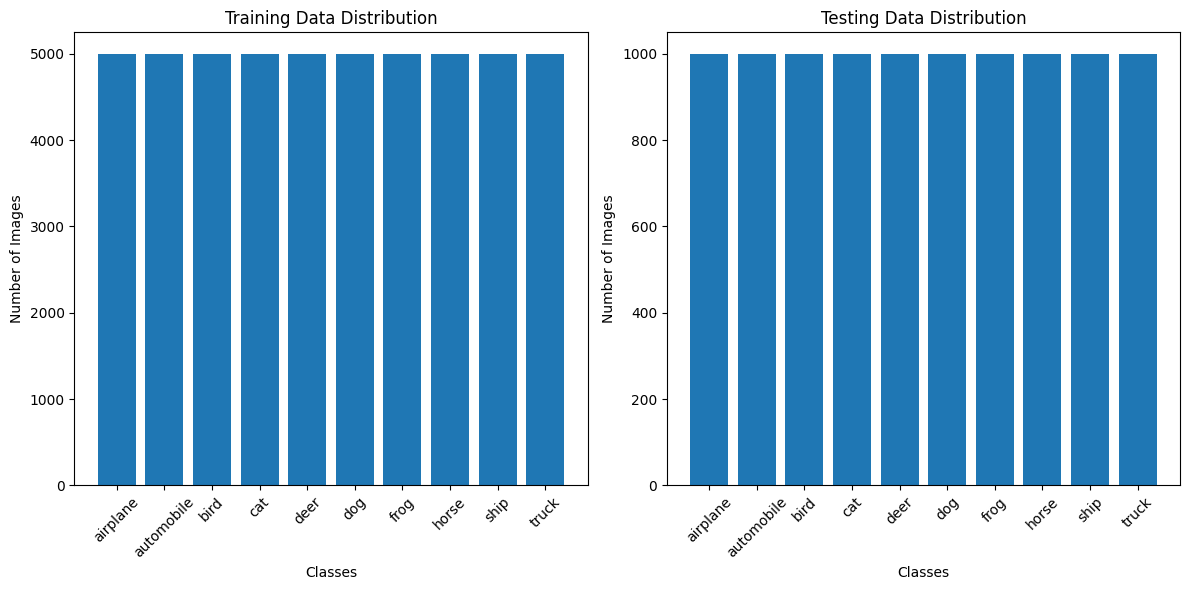

In [3]:
import matplotlib.pyplot as plt
from collections import Counter

# Counting the occurrences of each label
train_label_count = Counter(train_labels)
test_label_count = Counter(test_labels)

# Sorting the labels to ensure consistent order
sorted_train_labels = sorted(train_label_count.keys())
sorted_test_labels = sorted(test_label_count.keys())

# Getting counts in the order of sorted labels
train_counts = [train_label_count[label] for label in sorted_train_labels]
test_counts = [test_label_count[label] for label in sorted_test_labels]

# Plotting
plt.figure(figsize=(12, 6))

# Plot for training data
plt.subplot(1, 2, 1)
plt.bar(sorted_train_labels, train_counts)
plt.title('Training Data Distribution')
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)

# Plot for testing data
plt.subplot(1, 2, 2)
plt.bar(sorted_test_labels, test_counts)
plt.title('Testing Data Distribution')
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


## Normalize & Encode to One Hot Vectors

In [14]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Normalize the images
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Convert labels to numeric
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
test_labels_encoded = label_encoder.transform(test_labels)

# Print label mappings
label_mappings = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print(label_mappings)

# One-hot encode the labels
train_labels_categorical = to_categorical(train_labels_encoded)
test_labels_categorical = to_categorical(test_labels_encoded)


{'airplane': 0, 'automobile': 1, 'bird': 2, 'cat': 3, 'deer': 4, 'dog': 5, 'frog': 6, 'horse': 7, 'ship': 8, 'truck': 9}


## CNN Model Architecture

In [5]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
import numpy as np

# Define the model architecture using the functional API
input_layer = Input(shape=(32, 32, 3))

x = Conv2D(32, (3, 3), activation='relu')(input_layer)
x = MaxPooling2D(2, 2)(x)

x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(2, 2)(x)

x = Conv2D(128, (3, 3), activation='relu')(x)
x = Flatten()(x)

x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)

predictions = Dense(10, activation='softmax')(x)

# Create the model
model = Model(inputs=input_layer, outputs=predictions)


## Compile the model

In [6]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Model Training

In [7]:
history = model.fit(train_images, train_labels_categorical, epochs=10, validation_data=(test_images, test_labels_categorical))

Epoch 1/10
1563/1563 [==============================] - 82s 51ms/step - loss: 1.6986 - accuracy: 0.3769 - val_loss: 1.3647 - val_accuracy: 0.5087
Epoch 2/10
1563/1563 [==============================] - 79s 50ms/step - loss: 1.3858 - accuracy: 0.5115 - val_loss: 1.2225 - val_accuracy: 0.5736
Epoch 3/10
1563/1563 [==============================] - 83s 53ms/step - loss: 1.2529 - accuracy: 0.5604 - val_loss: 1.2087 - val_accuracy: 0.5704
Epoch 4/10
1563/1563 [==============================] - 76s 49ms/step - loss: 1.1636 - accuracy: 0.5924 - val_loss: 1.1301 - val_accuracy: 0.6055
Epoch 5/10
1563/1563 [==============================] - 80s 51ms/step - loss: 1.0993 - accuracy: 0.6161 - val_loss: 1.0897 - val_accuracy: 0.6181
Epoch 6/10
1563/1563 [==============================] - 77s 49ms/step - loss: 1.0395 - accuracy: 0.6359 - val_loss: 1.0657 - val_accuracy: 0.6308
Epoch 7/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.9896 - accuracy: 0.6531 - val_loss: 1.0358 -

## Evaluating the model

In [11]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels_categorical)
print(f"Test accuracy: {test_accuracy}")

313/313 [==============================] - 4s 11ms/step - loss: 1.0232 - accuracy: 0.6530
Test accuracy: 0.652999997138977


## Save Model

In [12]:
model.save('keras_model.keras')